## A/B Test Experimentation: Guided Example

Our theoretical company is a social networking site, called BlueBird. BlueBird has been using the same advertising email for years, and some at the company are starting to feel that it's getting a little stale. As the data driven individual, you propose an experiment. The marketing department draws up a new version of the email, and you'll conduct an A/B test comparing the two emails.

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
PATH = "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/1.4.11_experimentation_guided_example/experiment_data_2_wks.csv"
experiment_data = pd.read_csv(PATH)

In [5]:
experiment_data.head(10)

,treatment_date,test,is_signed_up,signup_date
0,2016-04-01,0,0,NaN
1,2016-04-01,0,0,NaN
2,2016-04-01,0,0,NaN
3,2016-04-01,0,0,NaN
4,2016-04-01,0,0,NaN
5,2016-04-01,0,0,NaN
6,2016-04-01,1,1,2016-04-02
7,2016-04-01,0,0,NaN
8,2016-04-01,0,0,NaN
9,2016-04-01,0,0,NaN


In [10]:
experiment_data.shape

(33613, 4)

In [6]:
experiment_data.columns

Index(['treatment_date', 'test', 'is_signed_up', 'signup_date'], dtype='object')

### How large is each group?

In [9]:
experiment_data[experiment_data.test==0].shape

(30241, 4)

In [18]:
experiment_data[experiment_data.test==1].shape

(3372, 4)

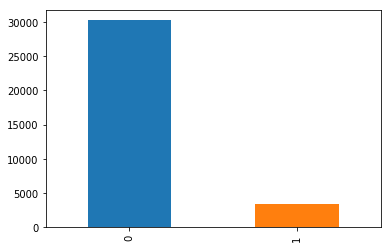

In [12]:
experiment_data['test'].value_counts().plot(kind='bar')

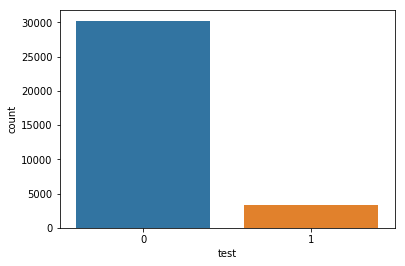

In [17]:
sns.countplot('test', data=experiment_data)

### What is the signup rate of test and control

In [21]:
test_group = experiment_data[experiment_data.test==1]

In [25]:
test_group['is_signed_up'].mean()

0.13701067615658363

In [26]:
control_group = experiment_data[experiment_data.test==0]

In [27]:
control_group['is_signed_up'].mean()

0.14708508316523924

### Is the experiment already significant?
The p value is greater than 0.05, therefore the null hypothesis can not be rejected. Hence there is no significant difference between the groups

In [53]:
stats.ttest_ind(test_group['is_signed_up'],control_group['is_signed_up'])

Ttest_indResult(statistic=-1.5711354292574262, pvalue=0.11616060761145311)

In [55]:
0.11616060761145311 > 5/100

True

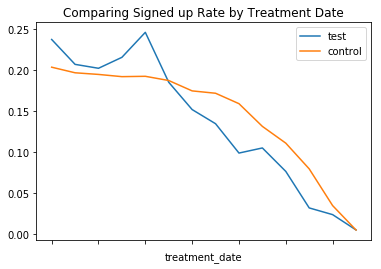

In [65]:
fig = test_group[['treatment_date', 'is_signed_up']].groupby('treatment_date').mean().plot()
control_group[['treatment_date', 'is_signed_up']].groupby('treatment_date').mean().plot(ax = fig)
plt.legend(['test', 'control'])
plt.title('Comparing Signed up Rate by Treatment Date')
plt.show()

In [58]:
control_group['is_signed_up'].value_counts()

0    25793
1     4448
Name: is_signed_up, dtype: int64